In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import os, sys, glob
sys.path.append('../')
from plotters import hexbin_plotter

# Set the seed for reproducibility
np.random.seed(42)

In [4]:
df_Obs = pd.read_csv('Heligoland_wind.csv',index_col=0,parse_dates=True)
# Creating a MultiIndex for columns
multi_index = pd.MultiIndex.from_product([['Obs_wind_speed'], df_Obs.columns])
# Assigning the MultiIndex to DataFrame columns
df_Obs.columns = multi_index
df_Obs

Obs_wind_speed                                          \
                           ws_40_m ws_50_m ws_60_m ws_70_m ws_80_m ws_90_m   
2017-03-23 12:10:00           8.67    9.19    9.68   10.19   10.63   10.93   
2017-03-23 12:20:00           8.21    8.77    9.24    9.67   10.13   10.45   
2017-03-23 12:30:00           7.59    8.05    8.63    9.11    9.58   10.03   
2017-03-23 12:40:00           7.71    7.96    8.34    8.83    9.43   10.01   
2017-03-23 12:50:00           7.94    8.55    9.22    9.82   10.35   10.78   
...                            ...     ...     ...     ...     ...     ...   
2018-04-11 23:10:00          11.61   11.95   12.25   12.49   12.60   12.68   
2018-04-11 23:20:00          11.89   12.15   12.34   12.57   12.80   13.00   
2018-04-11 23:30:00          12.10   12.45   12.71   12.92   13.13   13.23   
2018-04-11 23:40:00          11.50   11.81   12.07   12.32   12.53   12.73   
2018-04-11 23:50:00          11.10   11.42   11.66   11.77   11.89   12.03   

                                                         ...           \
                    ws_100_m ws_120_m ws_140_m ws_160_m  ... ws_260_m   
2017-03-23 12:10:00    11.11    10.99    10.60    10.22  ...    10.26   
2017-03-23 12:20:00    10.69    10.92    10.91    10.72  ...    10.76   
2017-03-23 12:30:00    10.41    10.73    10.69    10.64  ...    11.28   
2017-03-23 12:40:00    10.53    11.06    11.10    11.06  ...    11.36   
2017-03-23 12:50:00    11.15    11.64    11.67    11.66  ...    11.45   
...                      ...      ...      ...      ...  ...      ...   
2018-04-11 23:10:00    12.78    13.07    13.30    13.50  ...    14.10   
2018-04-11 23:20:00    13.14    13.40    13.66    13.74  ...    14.14   
2018-04-11 23:30:00    13.37    13.55    13.58    13.76  ...    14.49   
2018-04-11 23:40:00    12.89    13.08    13.12    13.17  ...    14.10   
2018-04-11 23:50:00    12.19    12.46    12.70    12.92  ...    13.76   

                                                                           \
                    ws_280_m ws_300_m ws_320_m ws_340_m ws_360_m ws_380_m   
2017-03-23 12:10:00    10.59    10.89    11.13    11.32    11.42    11.43   
2017-03-23 12:20:00    10.85    10.87    10.89    10.86    10.78    10.74   
2017-03-23 12:30:00    11.39    11.41    11.38    11.31    11.19    11.08   
2017-03-23 12:40:00    11.44    11.50    11.48    11.49    11.45    11.44   
2017-03-23 12:50:00    11.39    11.41    11.39    11.39    11.29    11.26   
...                      ...      ...      ...      ...      ...      ...   
2018-04-11 23:10:00    14.38    14.79    15.10    15.56    15.89    15.91   
2018-04-11 23:20:00    14.31    14.63    15.01    15.22    15.26    15.27   
2018-04-11 23:30:00    14.64    14.86    15.20    15.36    15.33    15.34   
2018-04-11 23:40:00    14.25    14.44    14.73    15.06    15.06    15.17   
2018-04-11 23:50:00    13.97    14.16    14.42    14.81    15.21    15.11   

                                                
                    ws_400_m ws_450_m ws_500_m  
2017-03-23 12:10:00    11.53    11.50    11.47  
2017-03-23 12:20:00    10.72    10.79    10.96  
2017-03-23 12:30:00    11.00    10.74    10.51  
2017-03-23 12:40:00    11.43    11.39    11.09  
2017-03-23 12:50:00    11.14    11.11    11.34  
...                      ...      ...      ...  
2018-04-11 23:10:00    15.95    16.09    16.15  
2018-04-11 23:20:00    15.29    15.16    14.46  
2018-04-11 23:30:00    15.05    12.97    11.46  
2018-04-11 23:40:00    15.08    13.35    10.50  
2018-04-11 23:50:00    14.89    13.65    10.85  

[55367 rows x 24 columns]

In [5]:
CERRA_wind = xr.open_dataset('CERRA_wind_profiles.nc')
df_CERRA = CERRA_wind.data.sel(obs=10).drop(['lat', 'lon']).to_dataframe(name='CERRA_wind_speed')
df_CERRA = df_CERRA.pivot_table(index='time', columns='heightAboveGround')
df_CERRA #['CERRA_wind_speed'][50.0]

CERRA_wind_speed                                   \
heightAboveGround              10.0       15.0       30.0       50.0    
time                                                                    
2000-01-01 00:00:00         7.514159   7.615616   7.915818   8.123905   
2000-01-01 01:00:00         7.646512   7.793873   8.105102   8.317096   
2000-01-01 02:00:00         7.737882   7.888812   8.238838   8.477695   
2000-01-01 03:00:00         7.989267   8.104017   8.449913   8.706039   
2000-01-01 04:00:00         8.644668   8.770977   9.155068   9.425721   
...                              ...        ...        ...        ...   
2018-12-31 19:00:00        11.884296  12.207248  12.934774  13.522358   
2018-12-31 20:00:00        12.457071  12.720173  13.503771  14.118941   
2018-12-31 21:00:00        12.081650  12.365162  13.173872  13.792901   
2018-12-31 22:00:00        12.754777  13.034994  13.842511  14.475731   
2018-12-31 23:00:00        13.115845  13.498597  14.344131  14.998956   

                                                                            \
heightAboveGround        75.0       100.0      150.0      200.0      250.0   
time                                                                         
2000-01-01 00:00:00   8.296660   8.407451   8.537147   8.622464   8.709006   
2000-01-01 01:00:00   8.485002   8.599485   8.762041   8.874892   8.988173   
2000-01-01 02:00:00   8.681562   8.825068   9.047337   9.409976  10.158683   
2000-01-01 03:00:00   8.919847   9.068680   9.293699   9.561033  10.104895   
2000-01-01 04:00:00   9.651643   9.803471  10.024162  10.174801  10.344176   
...                        ...        ...        ...        ...        ...   
2018-12-31 19:00:00  14.080390  14.526326  15.323472  16.149979  16.868574   
2018-12-31 20:00:00  14.689713  15.140662  15.959880  16.772768  17.462869   
2018-12-31 21:00:00  14.350440  14.793792  15.629809  16.576807  17.486662   
2018-12-31 22:00:00  15.065557  15.539628  16.458399  17.499977  18.473204   
2018-12-31 23:00:00  15.603394  16.085656  16.952769  17.899752  18.869515   

                                                      
heightAboveGround        300.0      400.0      500.0  
time                                                  
2000-01-01 00:00:00   8.794036   8.657262   8.198252  
2000-01-01 01:00:00   9.126681   8.592108   8.128541  
2000-01-01 02:00:00  10.760973  10.572390  10.146981  
2000-01-01 03:00:00  10.797046  11.818112  12.056904  
2000-01-01 04:00:00  10.540564  10.640548  10.271783  
...                        ...        ...        ...  
2018-12-31 19:00:00  17.267826  17.851890  18.258319  
2018-12-31 20:00:00  17.887483  18.121145  18.171531  
2018-12-31 21:00:00  17.902939  17.428267  16.873943  
2018-12-31 22:00:00  19.020515  18.932970  18.564057  
2018-12-31 23:00:00  19.521281  19.121784  18.533375  

[166560 rows x 12 columns]

In [6]:
df_merged = pd.merge(df_Obs, df_CERRA, left_index=True, right_index=True, how='inner')
df_merged.dropna(inplace=True)
print(df_merged.head())

                    Obs_wind_speed                                          \
                           ws_40_m ws_50_m ws_60_m ws_70_m ws_80_m ws_90_m   
2017-03-23 13:00:00           7.48    7.85    8.10    8.47    9.09    9.56   
2017-03-23 14:00:00           6.51    6.94    7.34    7.69    8.09    8.48   
2017-03-23 15:00:00           7.46    8.13    8.68    9.22    9.74   10.10   
2017-03-23 16:00:00           7.99    8.65    9.21    9.72   10.18   10.48   
2017-03-23 20:00:00           6.16    6.84    7.29    7.68    8.21    8.59   

                                                         ... CERRA_wind_speed  \
                    ws_100_m ws_120_m ws_140_m ws_160_m  ...             30.0   
2017-03-23 13:00:00     9.87    10.03     9.87     9.72  ...         7.287515   
2017-03-23 14:00:00     8.80     9.48     9.93    10.41  ...         7.991696   
2017-03-23 15:00:00    10.37    10.57    10.66    10.64  ...         8.056365   
2017-03-23 16:00:00    10.60    10.57    10.50  

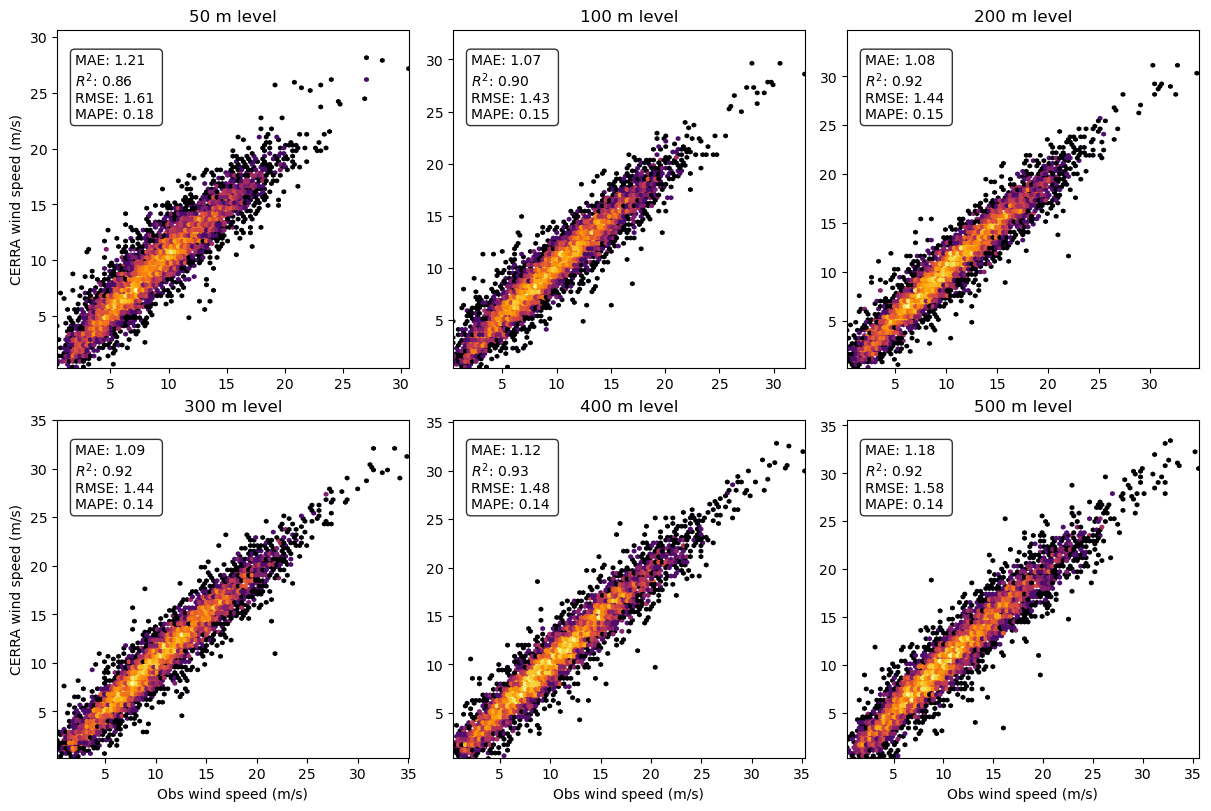

In [7]:
common_levels = [50, 100,200,300,400,500]

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = fig.add_gridspec(2,3)
for i,level in enumerate(common_levels):
    xlabel = 'Obs wind speed (m/s)' if i//3 == 1 else False
    ylabel = 'CERRA wind speed (m/s)' if i%3 == 0 else False
    hexbin_plotter(fig,gs[i//3, i%3],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                   df_merged['CERRA_wind_speed'][level],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
plt.savefig('Heligoland_CERRA_vs_Obs_wind_speed.png',dpi=300)

In [8]:
ds_ERA5 = xr.open_dataset('ERA5.nc')
df_ERA5 = ds_ERA5[['10ws','100ws']].isel(location=10).drop(['latitude', 'longitude','year']).to_dataframe()   
multi_index = pd.MultiIndex.from_product([['ERA5_wind_speed'], df_ERA5.columns])
# Assigning the MultiIndex to DataFrame columns
df_ERA5.columns = multi_index
# Converting the index to datetime
df_ERA5.index = pd.to_datetime(df_ERA5.index)
# Merging the DataFrames
df_merged = pd.merge(df_merged,df_ERA5, left_index=True, right_index=True, how='inner')

In [9]:
df_merged

Obs_wind_speed                                          \
                           ws_40_m ws_50_m ws_60_m ws_70_m ws_80_m ws_90_m   
2017-03-23 13:00:00           7.48    7.85    8.10    8.47    9.09    9.56   
2017-03-23 14:00:00           6.51    6.94    7.34    7.69    8.09    8.48   
2017-03-23 15:00:00           7.46    8.13    8.68    9.22    9.74   10.10   
2017-03-23 16:00:00           7.99    8.65    9.21    9.72   10.18   10.48   
2017-03-23 20:00:00           6.16    6.84    7.29    7.68    8.21    8.59   
...                            ...     ...     ...     ...     ...     ...   
2018-04-10 17:00:00          13.46   14.06   14.55   14.95   15.31   15.60   
2018-04-10 22:00:00          15.87   16.43   16.92   17.30   17.64   17.91   
2018-04-10 23:00:00          16.69   17.24   17.64   17.93   18.26   18.65   
2018-04-11 15:00:00          10.56   11.35   12.02   12.60   13.04   13.42   
2018-04-11 23:00:00          11.19   11.67   12.03   12.44   12.68   12.79   

                                                         ... CERRA_wind_speed  \
                    ws_100_m ws_120_m ws_140_m ws_160_m  ...             75.0   
2017-03-23 13:00:00     9.87    10.03     9.87     9.72  ...         8.979545   
2017-03-23 14:00:00     8.80     9.48     9.93    10.41  ...         9.985533   
2017-03-23 15:00:00    10.37    10.57    10.66    10.64  ...         9.818684   
2017-03-23 16:00:00    10.60    10.57    10.50    10.39  ...        10.117149   
2017-03-23 20:00:00     8.73     8.69     8.65     8.68  ...         8.811980   
...                      ...      ...      ...      ...  ...              ...   
2018-04-10 17:00:00    15.85    16.32    16.58    16.82  ...        15.953964   
2018-04-10 22:00:00    18.12    18.42    18.67    19.08  ...        17.216317   
2018-04-10 23:00:00    18.95    19.40    19.73    19.96  ...        16.480753   
2018-04-11 15:00:00    13.76    14.30    14.85    15.32  ...        14.729559   
2018-04-11 23:00:00    12.89    13.12    13.27    13.49  ...        12.617177   

                                                                            \
                         100.0      150.0      200.0      250.0      300.0   
2017-03-23 13:00:00   9.565446  10.104283  10.358266  10.551702  10.726713   
2017-03-23 14:00:00  10.663142  11.131642  11.247490  11.301587  11.347363   
2017-03-23 15:00:00  10.265827  10.488548  10.560410  10.594470  10.614524   
2017-03-23 16:00:00  10.557183  10.788175  10.875543  10.925095  10.945251   
2017-03-23 20:00:00   9.588012  10.113358  10.123500   9.503330   8.698546   
...                        ...        ...        ...        ...        ...   
2018-04-10 17:00:00  16.625517  17.759472  18.636080  19.295555  19.950371   
2018-04-10 22:00:00  17.704232  18.461726  19.141383  19.889264  20.887949   
2018-04-10 23:00:00  16.953092  17.684396  18.338167  19.074415  20.064597   
2018-04-11 15:00:00  15.335816  16.294445  16.977418  17.412803  17.720186   
2018-04-11 23:00:00  12.921806  13.410818  13.842238  14.438657  15.506441   

                                          ERA5_wind_speed             
                         400.0      500.0            10ws      100ws  
2017-03-23 13:00:00  11.047248  11.321177        7.220073   9.823848  
2017-03-23 14:00:00  11.406029  11.481140        7.046228   9.627012  
2017-03-23 15:00:00  10.612992  10.596967        7.091047   9.591036  
2017-03-23 16:00:00  10.938794  10.938998        6.935277   9.355033  
2017-03-23 20:00:00   8.061062   8.579489        5.995799   8.328894  
...                        ...        ...             ...        ...  
2018-04-10 17:00:00  20.916524  19.601528       12.905811  18.178183  
2018-04-10 22:00:00  23.818259  22.653647       12.224391  16.801662  
2018-04-10 23:00:00  22.760462  21.390733       12.487900  17.205727  
2018-04-11 15:00:00  18.243866  19.176010       11.356173  15.659333  
2018-04-11 23:00:00  17.155874  15.768158       10.261072  12.985371  

[6038 rows x

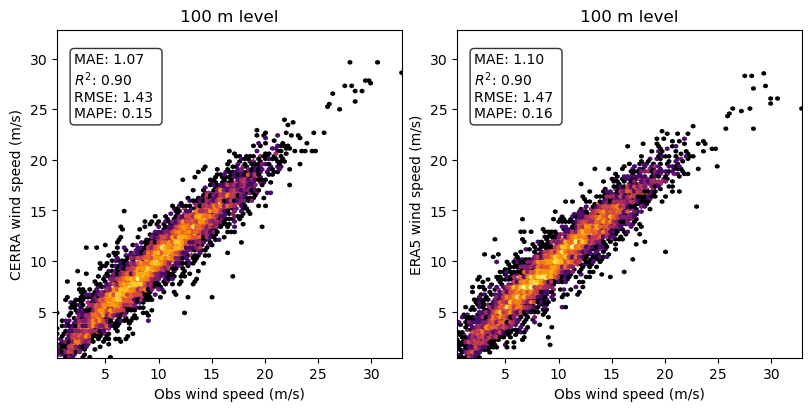

In [10]:
level = 100
fig = plt.figure(figsize=(8, 4), constrained_layout=True)
gs = fig.add_gridspec(1,2)
xlabel = 'Obs wind speed (m/s)'
ylabel = 'CERRA wind speed (m/s)'
hexbin_plotter(fig,gs[0, 0],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                df_merged['CERRA_wind_speed'][level],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
ylabel = 'ERA5 wind speed (m/s)'
hexbin_plotter(fig,gs[0, 1],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                df_merged['ERA5_wind_speed'][f'{level}ws'],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
plt.savefig('Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed.png',dpi=300)

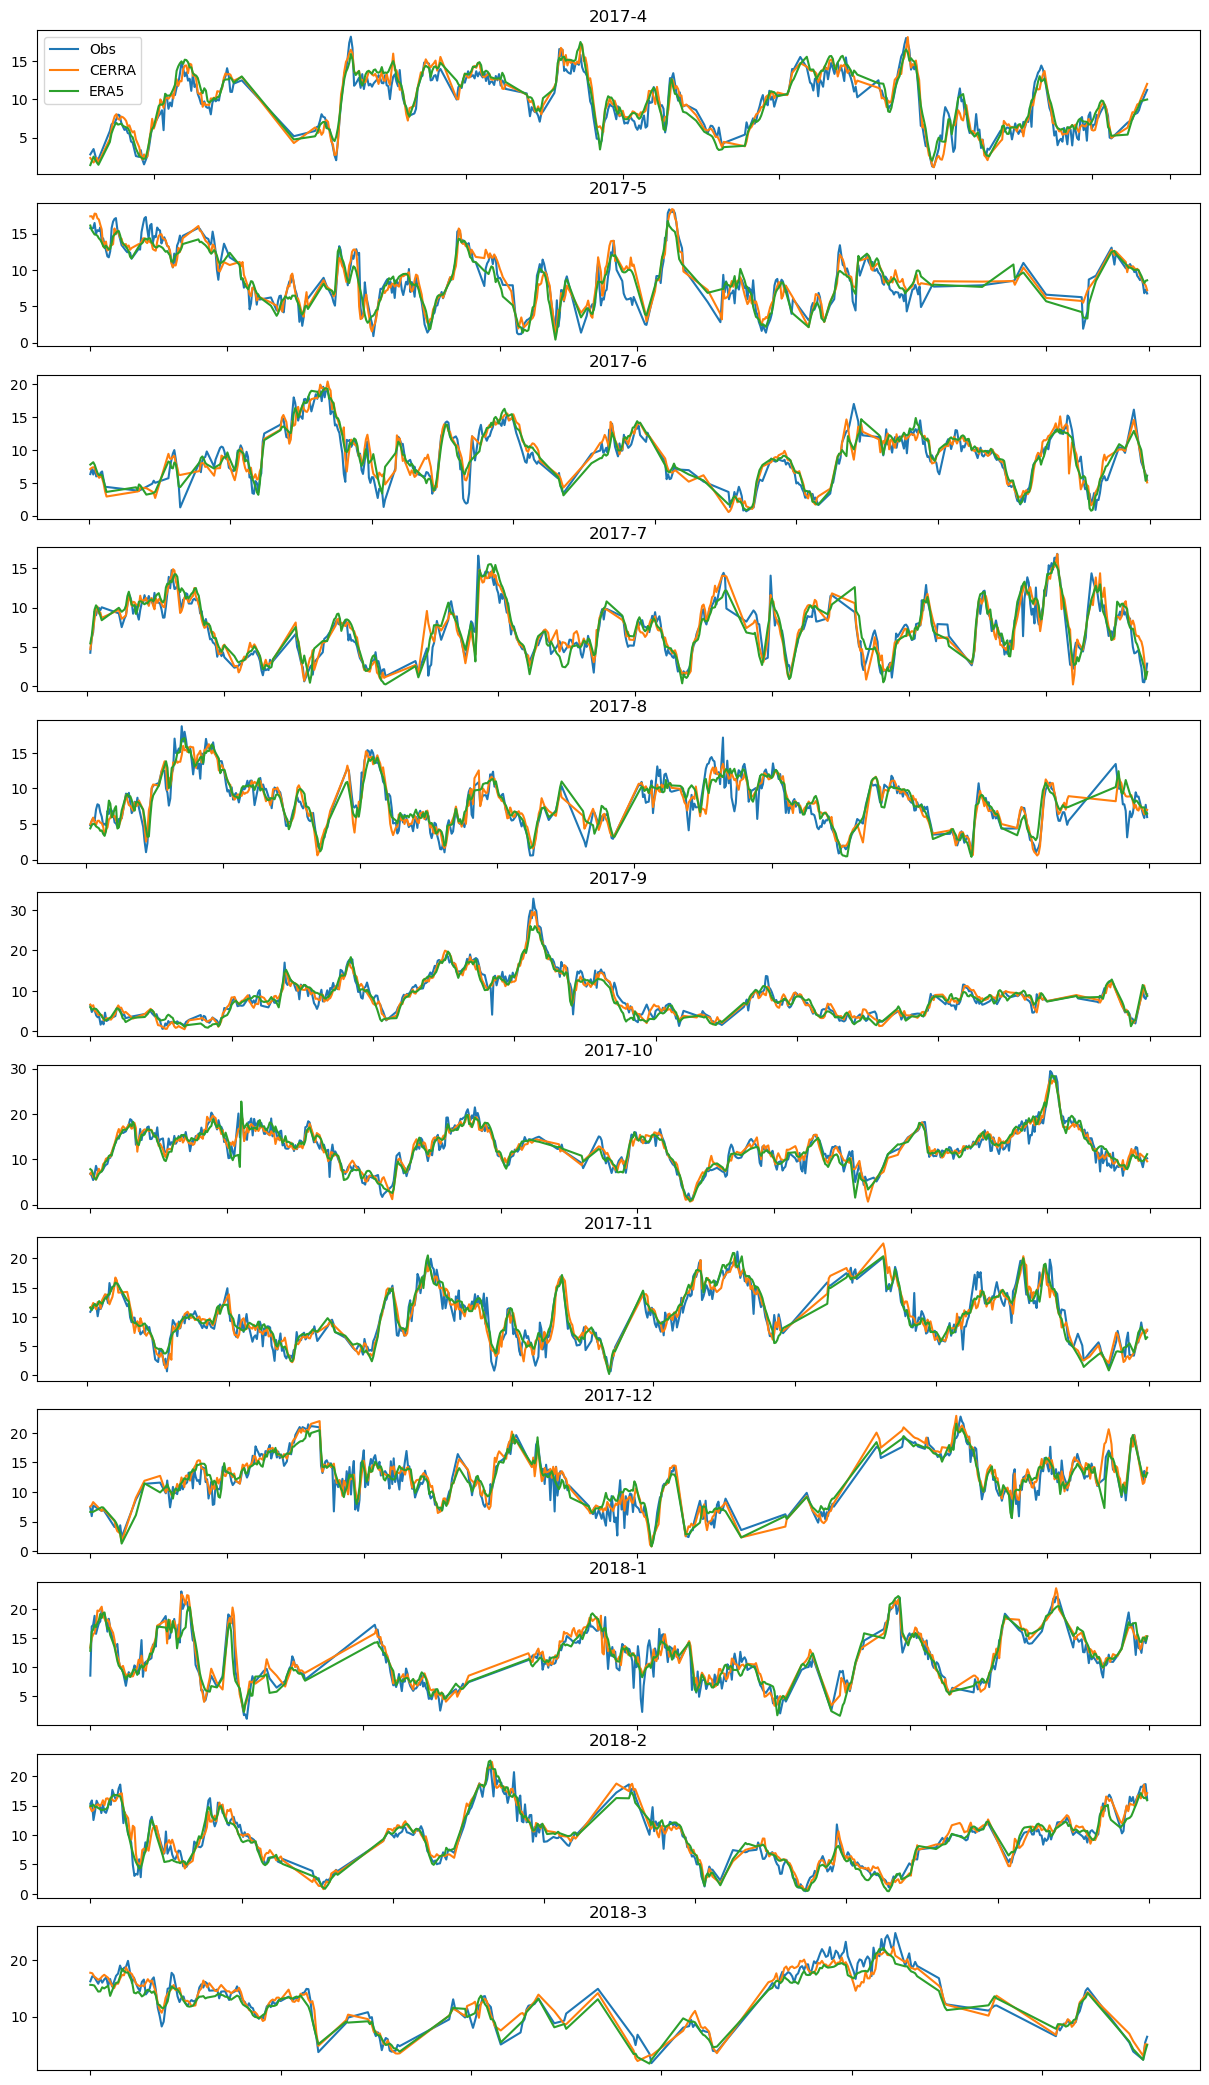

In [11]:
fig, axes = plt.subplots(12, figsize=(15, 30))
data = df_merged.loc['2017-04-01 00:00:00':'2018-04-01 00:00:00']
for i, month in enumerate(data.index.month.unique()):
    ax = axes.flatten()[i]
    data[data.index.month == month]['Obs_wind_speed'][f'ws_{level}_m'].plot(ax=ax, label='Obs')
    data[data.index.month == month]['CERRA_wind_speed'][level].plot(ax=ax, label='CERRA')
    data[data.index.month == month]['ERA5_wind_speed'][f'{level}ws'].plot(ax=ax, label='ERA5')
    ax.set_title(f'{data[data.index.month==month].index.year[0]}-{month}')
    ax.set_xticklabels('')
    ax.legend() if i == 0 else None
plt.savefig('Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_timeseries.png',dpi=300,bbox_inches='tight')

### Plotting sample profiles

In [17]:
obs_levels = [40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 450, 500]
CERRA_levels = [10., 15., 30., 50., 75., 100., 150., 200., 250., 300., 400., 500.]
ERA5_levels = [10, 100]
def profile_plotter_movie(data, rows, cols , out_file):
    fig = plt.figure(figsize=(cols*3, rows*2.5))
    gs = fig.add_gridspec(rows,cols)
    for i in range(rows*cols):
        ax = fig.add_subplot(gs[i//cols, i%cols])

        ax.plot(data['Obs_wind_speed'].iloc[i].T,obs_levels,  '--r', linewidth=2, markerfacecolor='r',label='Obs profile')
        ax.plot(data['CERRA_wind_speed'].iloc[i].T,CERRA_levels,  '-k', linewidth=2,label='CERRA profile')
        ax.plot(data['ERA5_wind_speed'].iloc[i].T, ERA5_levels, 'dg', markerfacecolor='g', label='ERA5')
        ax.set_xlim([0, 30])
        ax.set_ylim([0, 500])
        ax.set_title(data.index[i])
        xlabel = 'Wind Speed (m/s)' if i//cols == (rows-1) else False
        ylabel = 'Height (m)' if i%cols == 0 else False
        ax.set_xlabel(xlabel) if i//cols == (rows-1) else None
        ax.set_ylabel(ylabel) if i%cols == 0 else None
        if not ylabel:
            ax.yaxis.set_ticks([])
        if not xlabel:
            ax.xaxis.set_ticks([])

    # Place a common legend at the bottom
    plt.legend(bbox_to_anchor=(0.25, -0.3), borderaxespad=0.,ncol=3)

    if out_file:
        plt.savefig(out_file,dpi=300,bbox_inches='tight')
        plt.close()
    else:
        plt.show()

In [32]:
data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
# generate 24 random instances out of data, make sure the rows are not empty
data = data.loc[data.index.isin(np.random.choice(data.index, 24, replace=False))]

rows,cols = 6,4
out_file = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles.png'

profile_plotter_movie(data, rows, cols, out_file)

## Wind profile movie

IndexError: single positional indexer is out-of-bounds

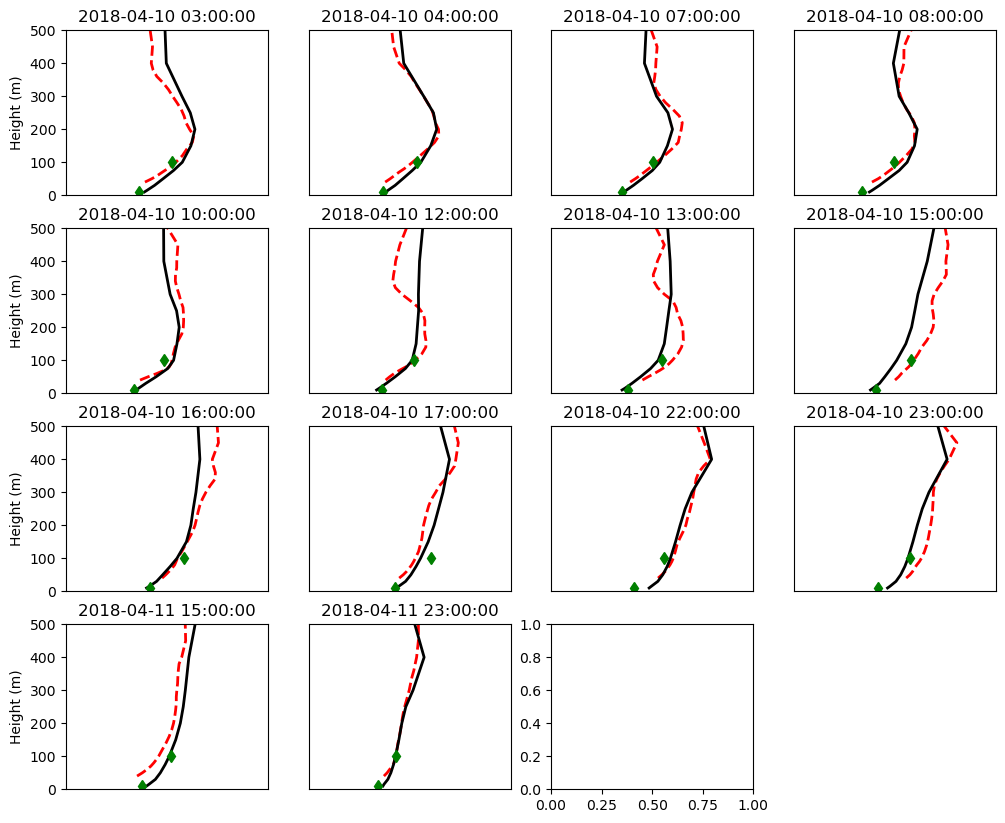

In [96]:
data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
rows,cols = 6,4
[(i,min(i+rows*cols,len(data))) for i in np.arange(0,len(data),rows*cols)]
for i,j in [(i,min(i+rows*cols,len(data))) for i in np.arange(0,len(data),rows*cols)]:
    out_file = f'obs_wind_profiles_movie/Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_{i}_{j}.png'
    profile_plotter_movie(data[i:j], rows, cols, out_file)

## Identify suitable window for resampling of observed data

- The observations are measured at every 10 minutes.
- If one wants to correlate the observations with model simulations, there is going to be temporal mismatch all the time, which is unavoidable. 
- To mitigate this issue, one can resample the observations at every hour by using mean or maximum methods. 
- However, what should be the window size is a question. 
- So, better to do series of checks to identify the optimum window size. 
- It could be, +- 30 min, 20 min, 10 min, or even instantenaous. 

In [4]:
df_Obs = pd.read_csv('Heligoland_wind.csv',index_col=0,parse_dates=True)
df_Obs.dropna(inplace=True)
# check if there exist any datetime index values with seconds not equal to 0
print('Number of time instances with nonzero seconds',len(df_Obs.index[df_Obs.index.second != 0]))

CERRA_wind = xr.open_mfdataset(['CERRA_height_level/2017.nc','CERRA_height_level/2018.nc'],concat_dim='time',combine='nested',parallel=True)
df_CERRA = CERRA_wind.data.sel(obs=10).drop(['lat', 'lon']).to_dataframe(name='CERRA_wind_speed')
df_CERRA = df_CERRA.pivot_table(index='time', columns='heightAboveGround')

ds_ERA5 = xr.open_dataset('ERA5.nc')
df_ERA5 = ds_ERA5[['10ws','100ws']].isel(location=10).drop(['latitude', 'longitude','year']).to_dataframe()   
multi_index = pd.MultiIndex.from_product([['ERA5_wind_speed'], df_ERA5.columns])
# Assigning the MultiIndex to DataFrame columns
df_ERA5.columns = multi_index
# Converting the index to datetime
df_ERA5.index = pd.to_datetime(df_ERA5.index)

# Find time instances where minutes == 0
hourly_indices = df_Obs.index[df_Obs.index.minute == 0]
print('Number of hourly instances',len(hourly_indices))
print(hourly_indices[0:5])

# generate 24 random instances out of data, make sure the rows are not empty
np.random.seed(42)
plotting_indices = hourly_indices.isin(np.random.choice(hourly_indices, 24, replace=False))

Number of time instances with nonzero seconds 0
Number of hourly instances 6038
DatetimeIndex(['2017-03-23 13:00:00', '2017-03-23 14:00:00',
               '2017-03-23 15:00:00', '2017-03-23 16:00:00',
               '2017-03-23 20:00:00'],
              dtype='datetime64[ns]', freq=None)


In [7]:
for window in [30, 20, 10, 0]:
    prev_indices = hourly_indices - pd.Timedelta(minutes=window)
    print(prev_indices[0:5])
    next_indices = hourly_indices + pd.Timedelta(minutes=window)
    print(next_indices[0:5])

    mean_data = []
    for prev, next in zip(prev_indices, next_indices):
        mean = df_Obs.loc[prev:next].mean()
        mean_data.append(mean)

    # Convert the list of means into a DataFrame
    mean_df = pd.DataFrame(mean_data, index=hourly_indices)

    multi_index = pd.MultiIndex.from_product([['Obs_wind_speed'], mean_df.columns])
    # Assigning the MultiIndex to DataFrame columns
    mean_df.columns = multi_index
    
    df_merged = pd.merge(mean_df, df_CERRA, left_index=True, right_index=True, how='inner')
    df_merged.dropna(inplace=True)

    # Merging the DataFrames
    df_merged = pd.merge(df_merged,df_ERA5, left_index=True, right_index=True, how='inner')

    data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
    data = data.loc[plotting_indices]

    rows,cols = 6,4
    out_file = f'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_{window}min.png'

    profile_plotter_movie(data, rows, cols, out_file)

DatetimeIndex(['2017-03-23 12:30:00', '2017-03-23 13:30:00',
               '2017-03-23 14:30:00', '2017-03-23 15:30:00',
               '2017-03-23 19:30:00'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-03-23 13:30:00', '2017-03-23 14:30:00',
               '2017-03-23 15:30:00', '2017-03-23 16:30:00',
               '2017-03-23 20:30:00'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-03-23 12:40:00', '2017-03-23 13:40:00',
               '2017-03-23 14:40:00', '2017-03-23 15:40:00',
               '2017-03-23 19:40:00'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-03-23 13:20:00', '2017-03-23 14:20:00',
               '2017-03-23 15:20:00', '2017-03-23 16:20:00',
               '2017-03-23 20:20:00'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-03-23 12:50:00', '2017-03-23 13:50:00',
               '2017-03-23 14:50:00', '2017-03-23 15:50:00',
               '2017-03-23 19:50:00'],

### one with hourly samplng

In [98]:
hourly_indices[plotting_indices]

DatetimeIndex(['2017-04-16 12:00:00', '2017-04-22 20:00:00',
               '2017-05-06 22:00:00', '2017-05-09 21:00:00',
               '2017-05-11 07:00:00', '2017-05-14 20:00:00',
               '2017-05-19 14:00:00', '2017-06-10 04:00:00',
               '2017-06-19 21:00:00', '2017-07-09 15:00:00',
               '2017-08-04 06:00:00', '2017-08-06 02:00:00',
               '2017-08-09 03:00:00', '2017-08-18 10:00:00',
               '2017-08-28 12:00:00', '2017-10-01 14:00:00',
               '2017-10-30 06:00:00', '2017-11-11 15:00:00',
               '2018-01-02 15:00:00', '2018-01-10 18:00:00',
               '2018-02-02 11:00:00', '2018-02-18 21:00:00',
               '2018-03-02 09:00:00', '2018-03-06 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [99]:
# Convert the list of means into a DataFrame
mean_df = df_Obs.resample('H').mean()

multi_index = pd.MultiIndex.from_product([['Obs_wind_speed'], mean_df.columns])
# Assigning the MultiIndex to DataFrame columns
mean_df.columns = multi_index

df_merged = pd.merge(mean_df, df_CERRA, left_index=True, right_index=True, how='inner')
df_merged.dropna(inplace=True)

# Merging the DataFrames
df_merged = pd.merge(df_merged,df_ERA5, left_index=True, right_index=True, how='inner')

data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
data = data.loc[hourly_indices[plotting_indices]]

rows,cols = 6,4
out_file = f'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_resampled_at_1hr.png'

profile_plotter_movie(data, rows, cols, out_file)

Conclusion is that all windows are more or less similar, so better with resampling 1 hour.

## Filtering unmatched profiles based on 100 m wind speed

In [18]:
df_Obs = pd.read_csv('Heligoland_wind.csv',index_col=0,parse_dates=True)
df_Obs = df_Obs.resample('H').mean()
df_Obs.dropna(inplace=True)
# check if there exist any datetime index values with seconds not equal to 0
print('Number of time instances with nonzero seconds',len(df_Obs.index[df_Obs.index.second != 0]))

multi_index = pd.MultiIndex.from_product([['Obs_wind_speed'], df_Obs.columns])
# Assigning the MultiIndex to DataFrame columns
df_Obs.columns = multi_index

CERRA_wind = xr.open_mfdataset(['CERRA_height_level/2017.nc','CERRA_height_level/2018.nc'],concat_dim='time',combine='nested',parallel=True)
df_CERRA = CERRA_wind.data.sel(obs=10).drop(['lat', 'lon']).to_dataframe(name='CERRA_wind_speed')
df_CERRA = df_CERRA.pivot_table(index='time', columns='heightAboveGround')

ds_ERA5 = xr.open_dataset('ERA5.nc')
df_ERA5 = ds_ERA5[['10ws','100ws']].isel(location=10).drop(['latitude', 'longitude','year']).to_dataframe()   
multi_index = pd.MultiIndex.from_product([['ERA5_wind_speed'], df_ERA5.columns])
# Assigning the MultiIndex to DataFrame columns
df_ERA5.columns = multi_index
# Converting the index to datetime
df_ERA5.index = pd.to_datetime(df_ERA5.index)

df_merged = pd.merge(df_Obs, df_CERRA, left_index=True, right_index=True, how='inner')
df_merged = pd.merge(df_merged,df_ERA5, left_index=True, right_index=True, how='inner')

Number of time instances with nonzero seconds 0


In [9]:
# Find time instances where 100 m wind speed bias is less than or equal to 1 m/s
matched_indices = df_merged.index[np.abs(df_merged['Obs_wind_speed']['ws_100_m'] - df_merged['ERA5_wind_speed']['100ws'])<=3]
print('Number of matched instances',len(matched_indices))

# generate 24 random instances out of data, make sure the rows are not empty
np.random.seed(42)
plotting_indices = matched_indices.isin(np.random.choice(matched_indices, 100, replace=False))

data = df_merged.loc[matched_indices[plotting_indices]]

rows,cols = 10,10
out_file = f'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_matched_indices.png'

profile_plotter_movie(data, rows, cols, out_file)

Number of matched instances 6779


### Extract four wind regimes based on the Chebyshev coefficients from observations, from the matched profiles

In [41]:
coeff = xr.open_dataset('Heligoland_Chebyshev_Coefficnents.nc')
data = coeff.data.sel(time=matched_indices).sel(time=slice('2018-02-01 00:00:00','2018-04-11 23:00:00'))

# low shear| well mixed
low_shear_indices = coeff.time.where((data.sel(coeff=1)>-1) & (data.sel(coeff=1)<=1)
                                     & (data.sel(coeff=2)>-0.1) & (data.sel(coeff=2)<=0.1)
                                     & (data.sel(coeff=3)>-0.1) & (data.sel(coeff=3)<=0.1)
                                     & (data.sel(coeff=4)>-0.1) & (data.sel(coeff=4)<=0.1)
                                     ).dropna(dim='time')
print('Number of low shear instances',len(low_shear_indices))

# log law
log_law_indices = coeff.time.where((data.sel(coeff=1)<3)
                                      & (data.sel(coeff=2)<-1) & (data.sel(coeff=2)>=-2)).dropna(dim='time')
print('Number of log law instances',len(log_law_indices))

# low level jets
LLJ_indices = coeff.time.where((data.sel(coeff=1)<3)
                                      & (data.sel(coeff=2)<-2.5)).dropna(dim='time')
print('Number of low level jets instances',len(LLJ_indices))

# high shear
high_shear_indices = coeff.time.where((data.sel(coeff=1)>=3)
                                      & (data.sel(coeff=2)>=-2)).dropna(dim='time')
print('Number of high shear instances',len(high_shear_indices))

Number of low shear instances 27
Number of log law instances 101
Number of low level jets instances 19
Number of high shear instances 75


5 6


IndexError: single positional indexer is out-of-bounds

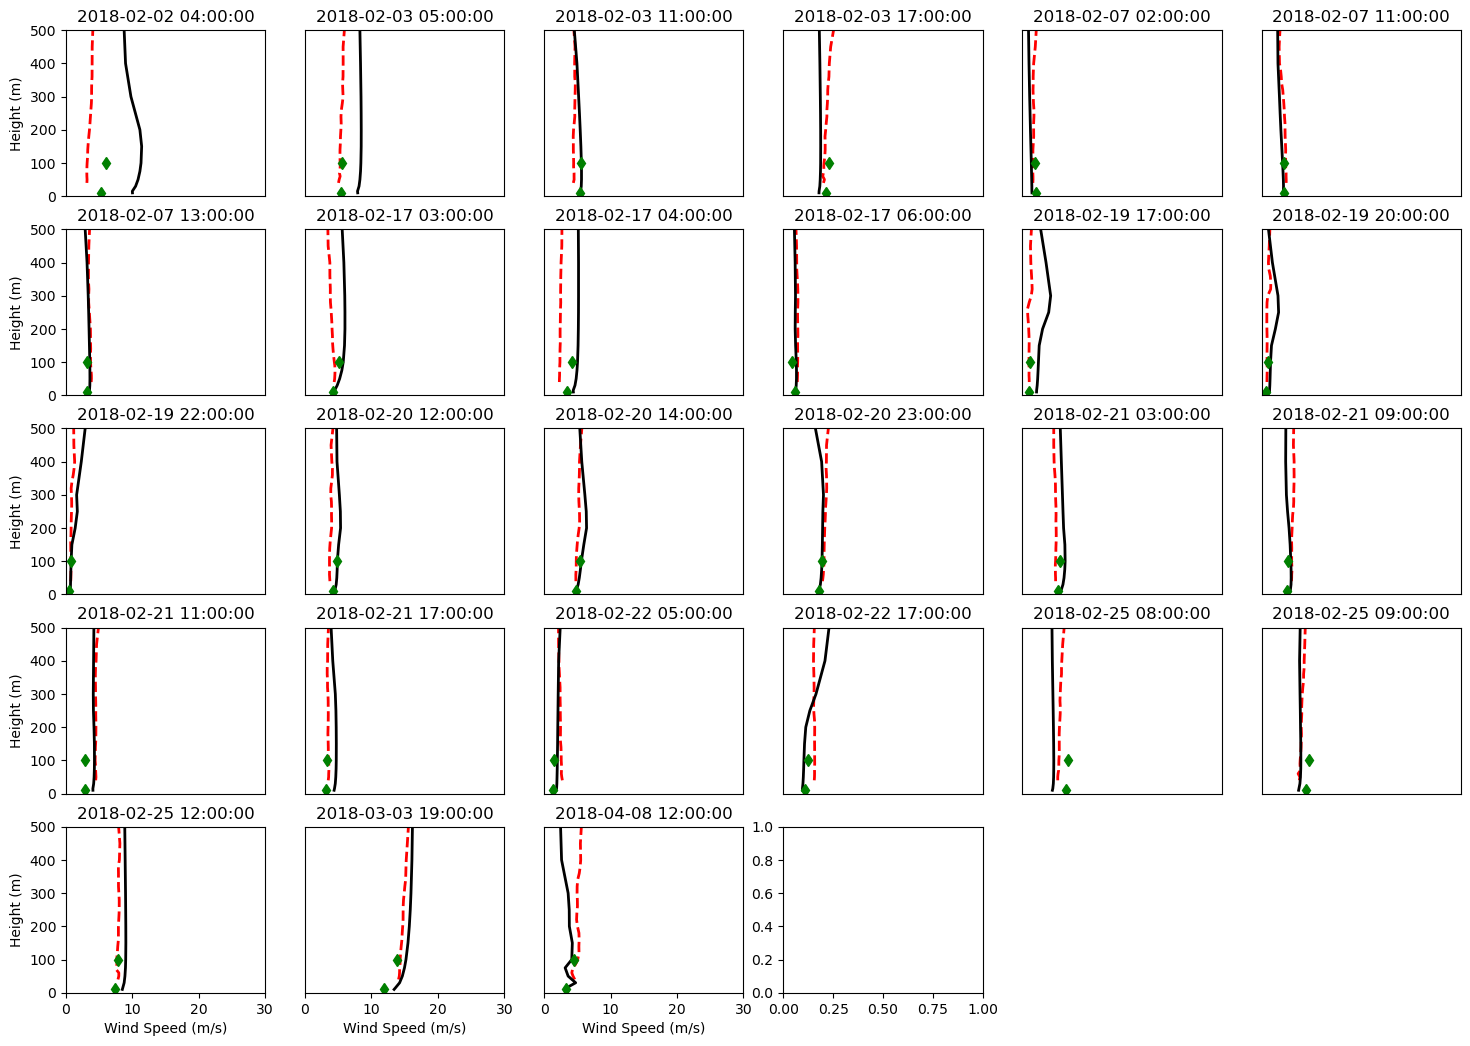

In [42]:
import math
data = df_merged.loc[low_shear_indices]
num_plots = len(data)
num_rows = int(math.sqrt(num_plots))
num_cols = math.ceil(num_plots / num_rows)

# Adjust num_rows and num_cols if needed to make it closer to a square shape
while num_rows * num_cols < num_plots:
    num_rows += 1
print(num_rows,num_cols)
file_name = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_low_shear.png'
profile_plotter_movie(data, num_rows, num_cols, None)

10 11


IndexError: single positional indexer is out-of-bounds

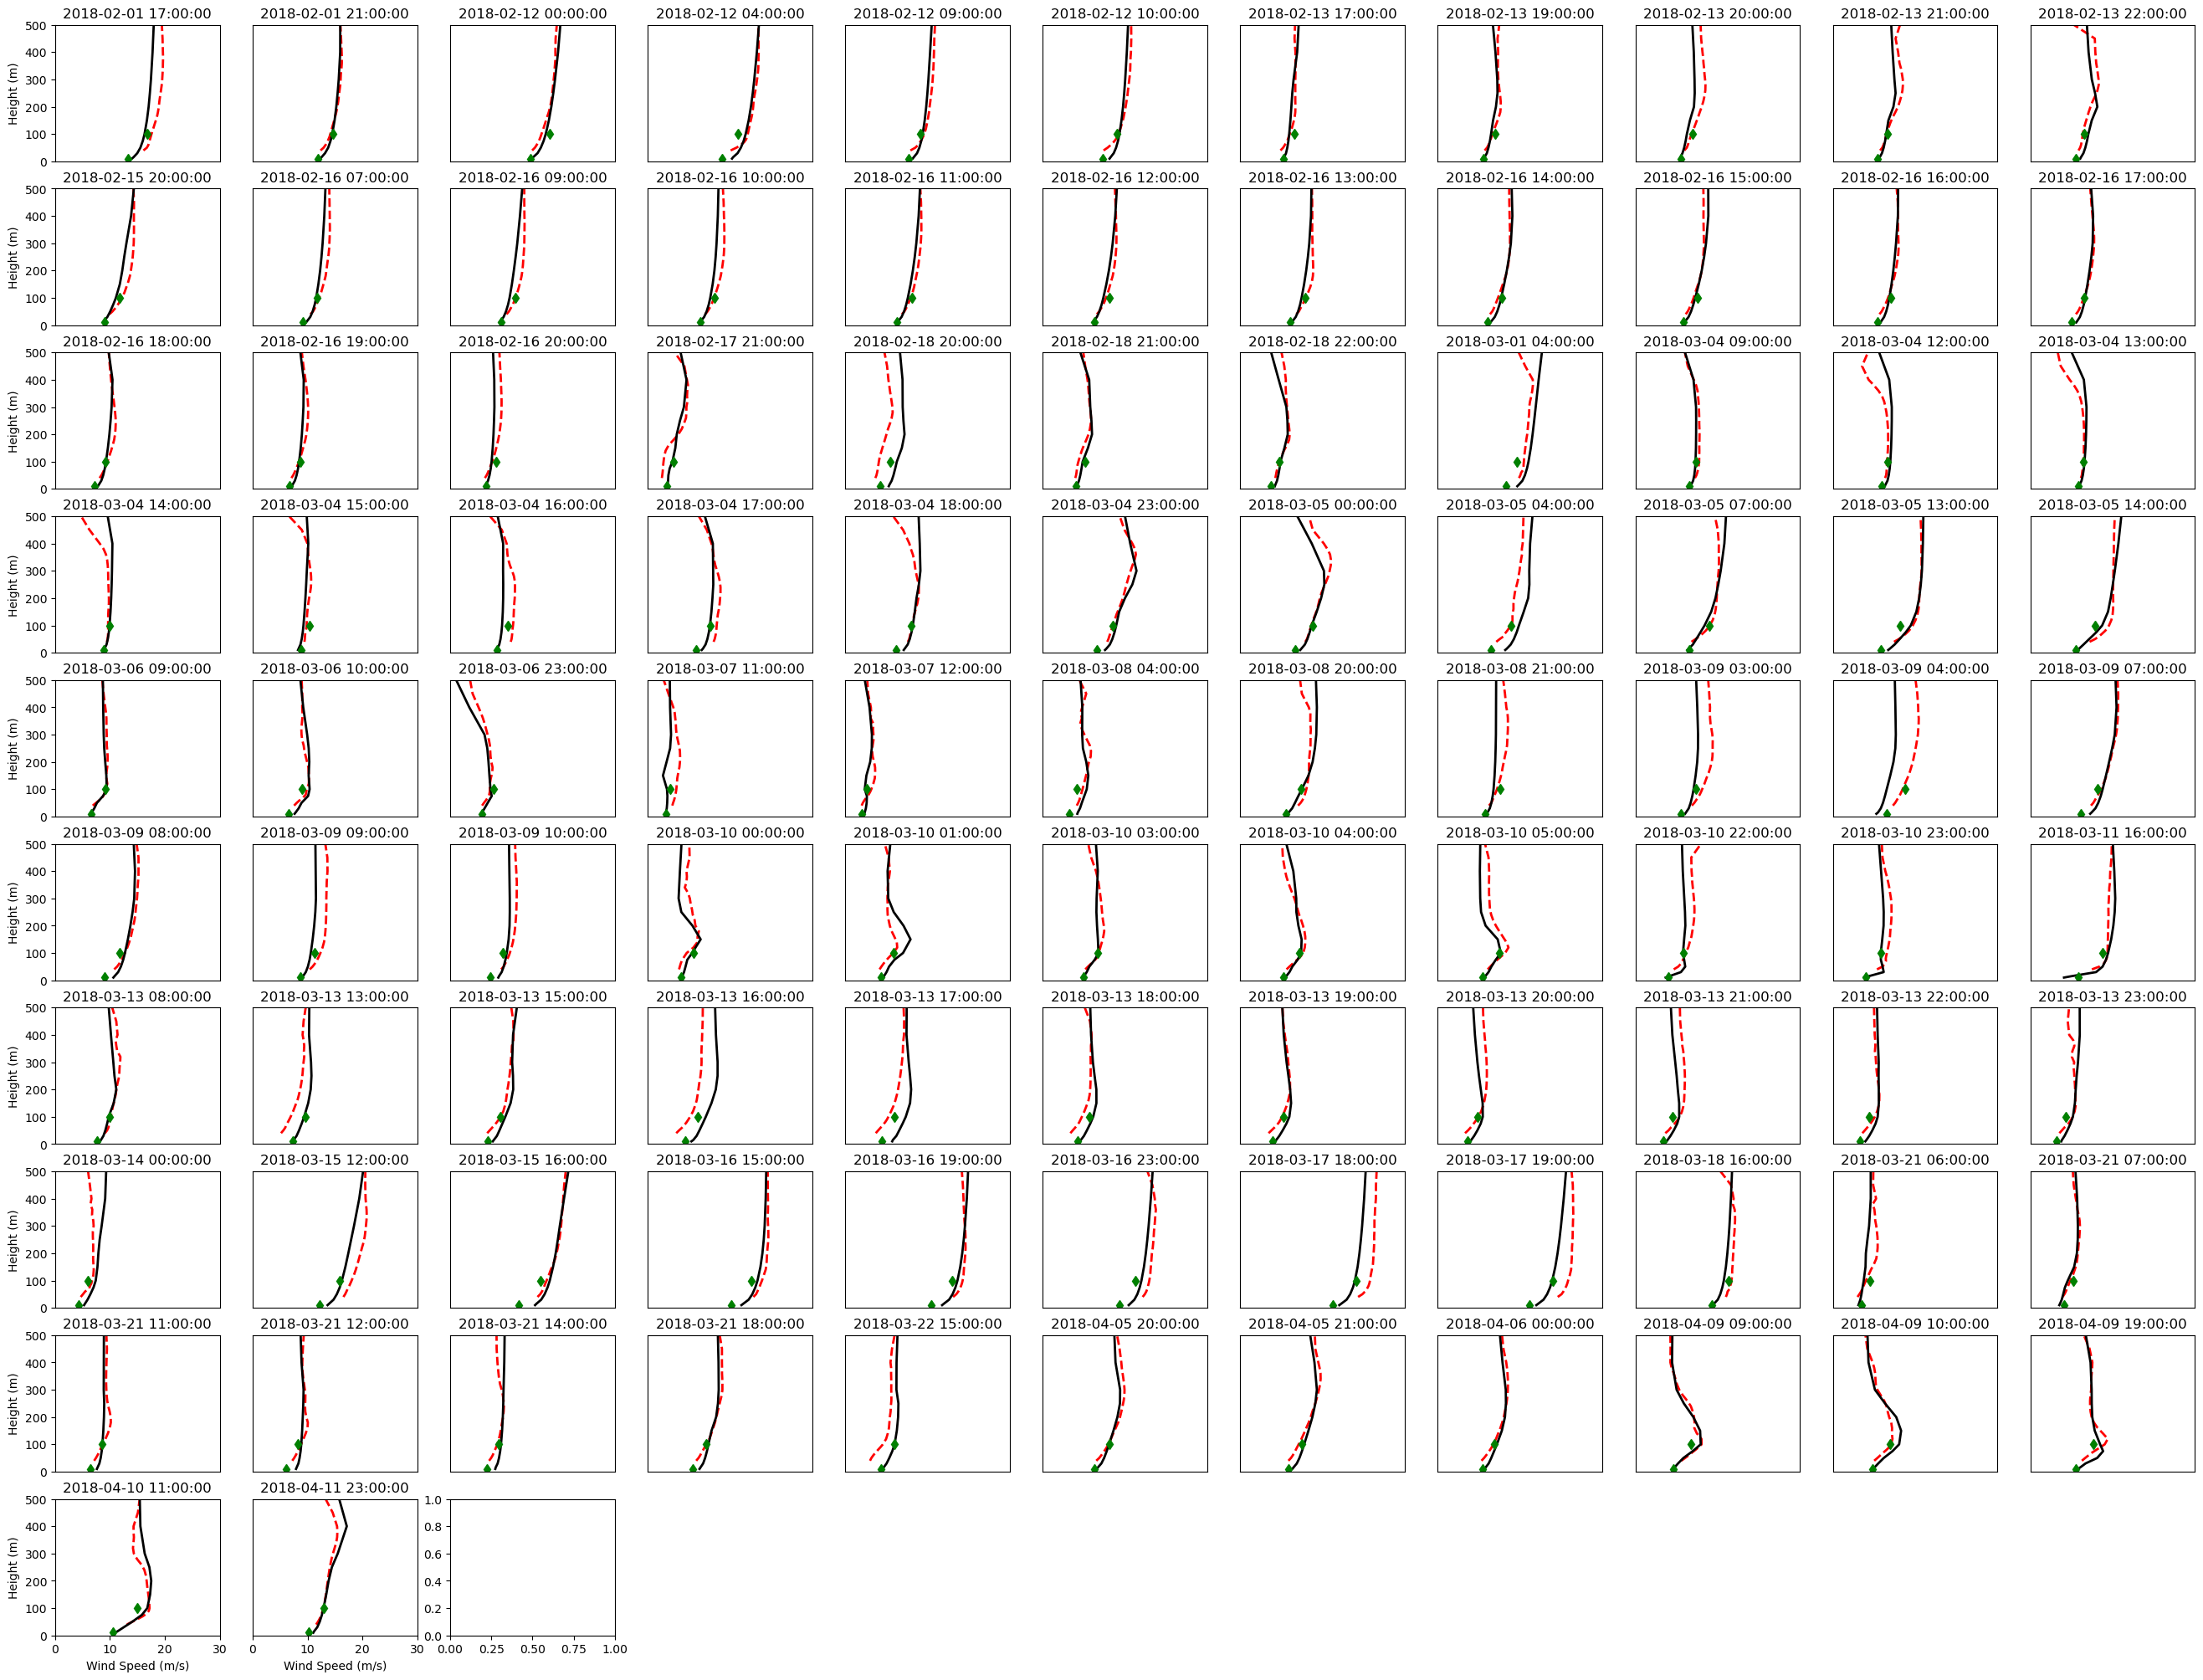

In [34]:
data = df_merged.loc[log_law_indices]
num_plots = len(data)
num_rows = int(math.sqrt(num_plots))
num_cols = math.ceil(num_plots / num_rows)

# Adjust num_rows and num_cols if needed to make it closer to a square shape
while num_rows * num_cols < num_plots:
    num_rows += 1
print(num_rows,num_cols)
file_name = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_log_law.png'
profile_plotter_movie(data, num_rows, num_cols, None)

IndexError: single positional indexer is out-of-bounds

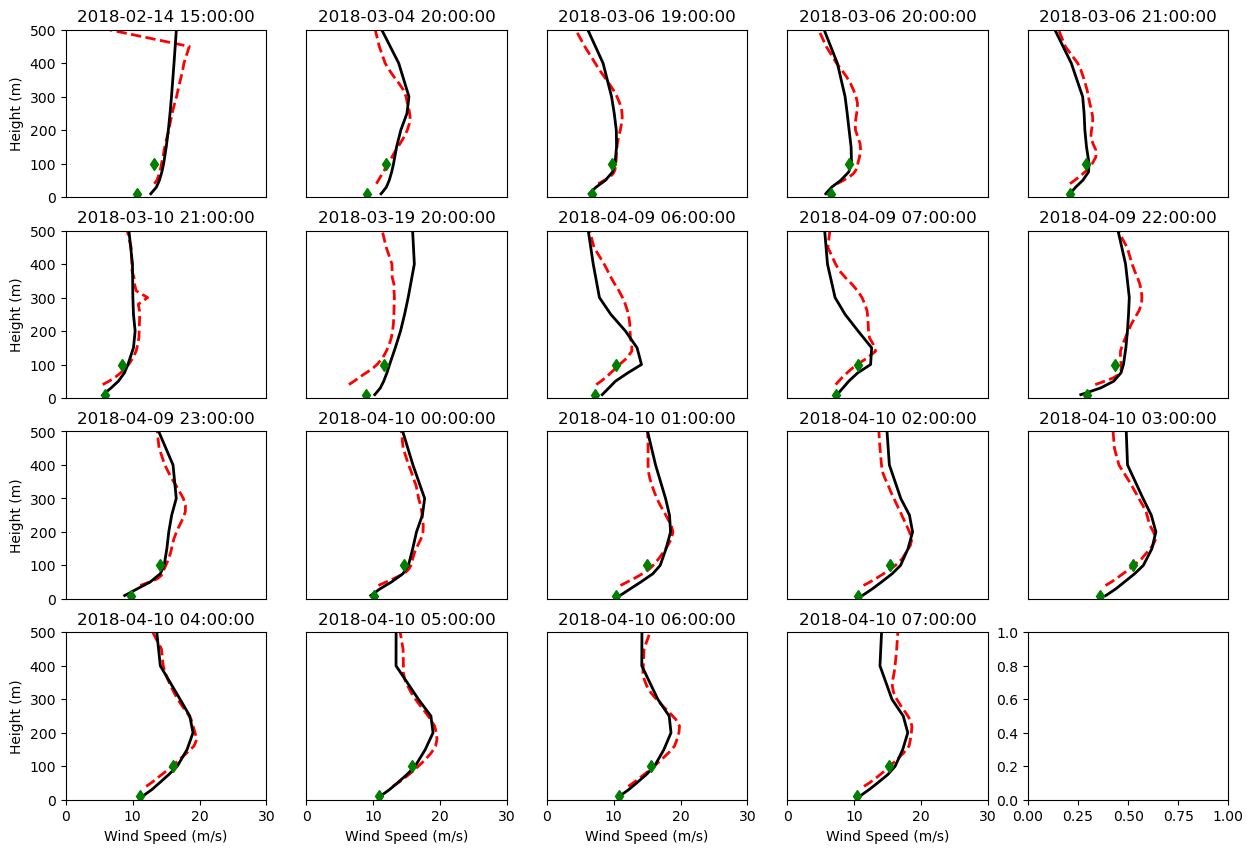

In [36]:
data = df_merged.loc[LLJ_indices]
num_plots = len(data)
num_rows = int(math.sqrt(num_plots))
num_cols = math.ceil(num_plots / num_rows)

# Adjust num_rows and num_cols if needed to make it closer to a square shape
while num_rows * num_cols < num_plots:
    num_rows += 1

file_name = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_LLJ.png'
profile_plotter_movie(data, num_rows, num_cols, None)

IndexError: single positional indexer is out-of-bounds

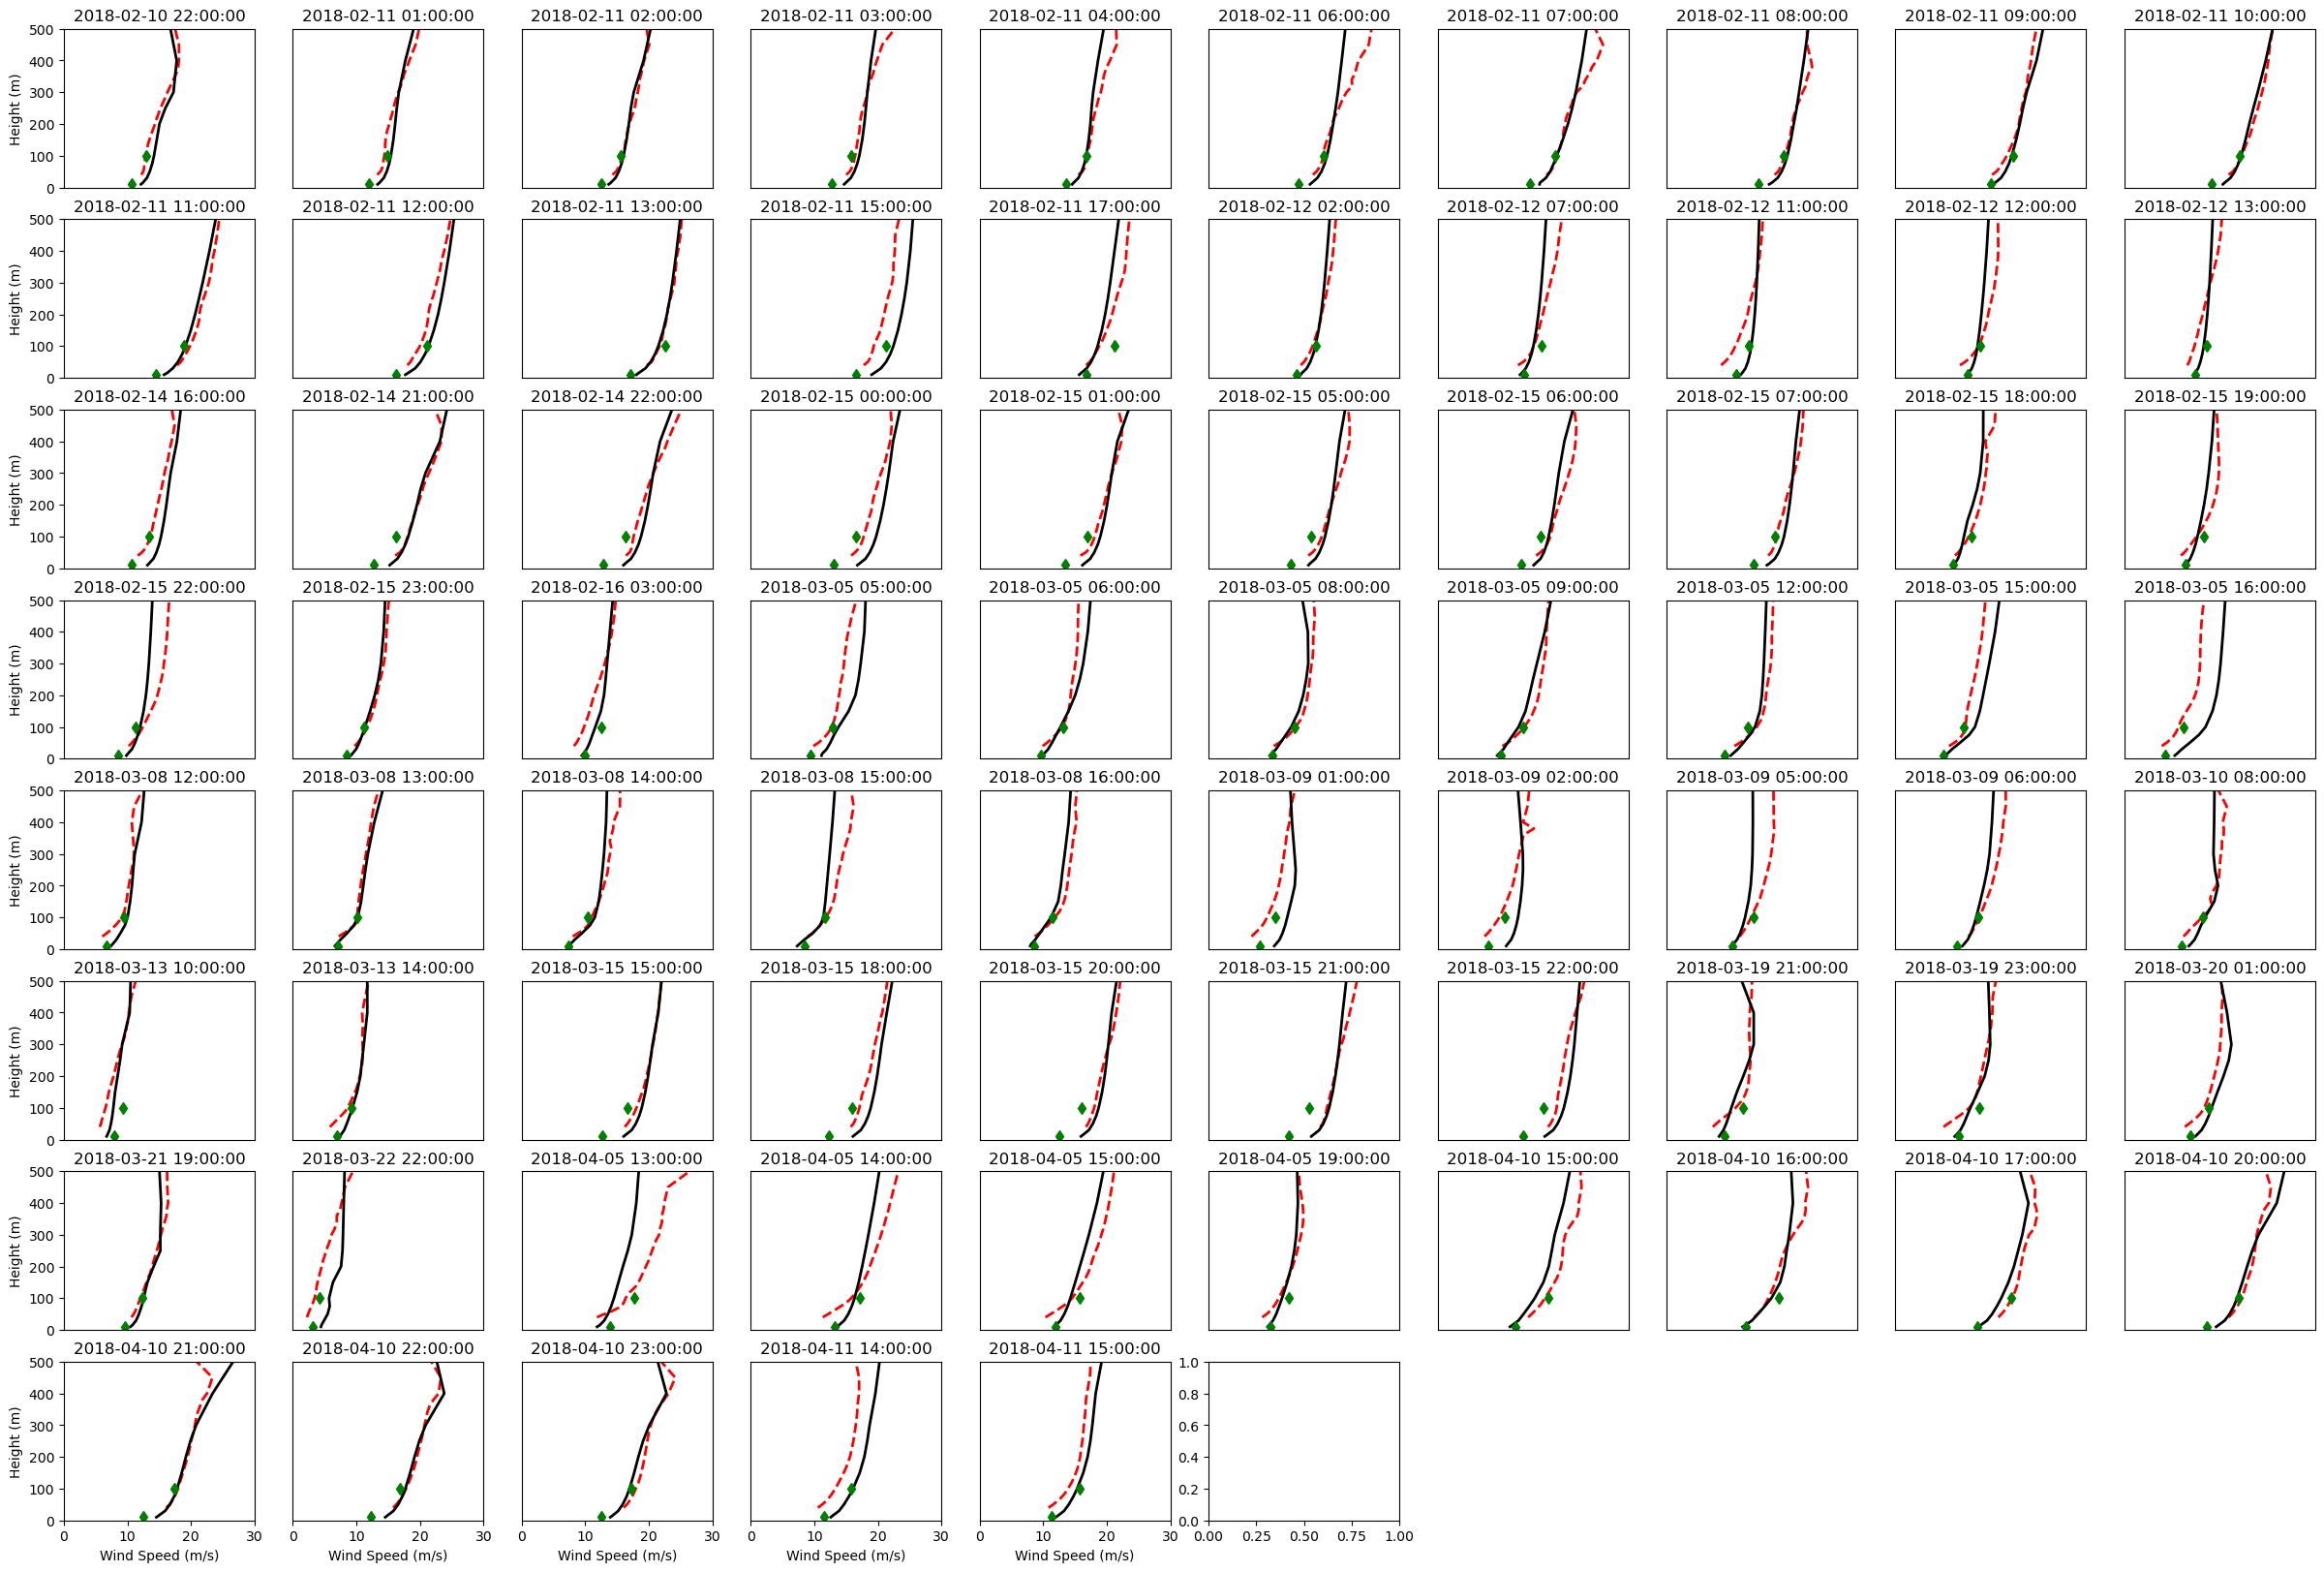

In [38]:
data = df_merged.loc[high_shear_indices]
num_plots = len(data)
num_rows = int(math.sqrt(num_plots))
num_cols = math.ceil(num_plots / num_rows)

# Adjust num_rows and num_cols if needed to make it closer to a square shape
while num_rows * num_cols < num_plots:
    num_rows += 1

file_name = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_high_shear.png'
profile_plotter_movie(data, num_rows, num_cols, None)

### Clustering wind regimes based ok k-means clustering